#Models which faced challenge

##Using Logistic Regression

In [ ]:
# smart_expense_categorizer

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Step 1: Create a sample dataset
data = {
    'description': [
        "Starbucks coffee",
        "Uber ride to airport",
        "Walmart groceries",
        "Netflix subscription",
        "Subway lunch",
        "Lyft ride downtown",
        "Whole Foods organic vegetables",
        "Movie theater tickets",
        "Burger King dinner",
        "Public bus fare",
        "Spotify music subscription",
        "Local farmer's market"
    ],
    'category': [
        "Food/Drink",    # Starbucks
        "Transport",     # Uber
        "Groceries",     # Walmart
        "Entertainment", # Netflix
        "Food/Drink",    # Subway
        "Transport",     # Lyft
        "Groceries",     # Whole Foods
        "Entertainment", # Movie theater
        "Food/Drink",    # Burger King
        "Transport",     # Public bus
        "Entertainment", # Spotify
        "Groceries"      # Farmer's market
    ]
}

df = pd.DataFrame(data)

# Step 2: Preprocess the data
# For simplicity, we use raw text here. In a more advanced version, you might clean text, remove stopwords, etc.
X = df['description']
y = df['category']

# Step 3: Vectorize the text data using CountVectorizer (bag-of-words)
vectorizer = CountVectorizer()
X_vect = vectorizer.fit_transform(X)

# Step 4: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.3, random_state=42)

# Step 5: Train a classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 7: Make predictions on new data
new_transactions = [
    "Dinner at McDonald's",
    "Taxi ride to station",
    "Amazon grocery order",
    "HBO Max subscription"
]

# Transform the new descriptions using the same vectorizer
new_transactions_vect = vectorizer.transform(new_transactions)
predicted_categories = clf.predict(new_transactions_vect)

print("\nNew Transaction Predictions:")
for desc, category in zip(new_transactions, predicted_categories):
    print(f"Description: {desc} => Predicted Category: {category}")


Classification Report:
               precision    recall  f1-score   support

Entertainment       1.00      1.00      1.00         1
   Food/Drink       0.00      0.00      0.00         2
    Groceries       0.00      0.00      0.00         0
    Transport       0.00      0.00      0.00         1

     accuracy                           0.25         4
    macro avg       0.25      0.25      0.25         4
 weighted avg       0.25      0.25      0.25         4


New Transaction Predictions:
Description: Dinner at McDonald's => Predicted Category: Groceries
Description: Taxi ride to station => Predicted Category: Transport
Description: Amazon grocery order => Predicted Category: Groceries
Description: HBO Max subscription => Predicted Category: Entertainment


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

Accuracy: 0.0

Classification Report:
               precision    recall  f1-score   support

Entertainment       0.00      0.00      0.00       1.0
   Food/Drink       0.00      0.00      0.00       2.0
    Groceries       0.00      0.00      0.00       0.0
    Transport       0.00      0.00      0.00       1.0

     accuracy                           0.00       4.0
    macro avg       0.00      0.00      0.00       4.0
 weighted avg       0.00      0.00      0.00       4.0

Confusion Matrix:
[[0 0 1 0]
 [0 0 2 0]
 [0 0 0 0]
 [0 0 1 0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

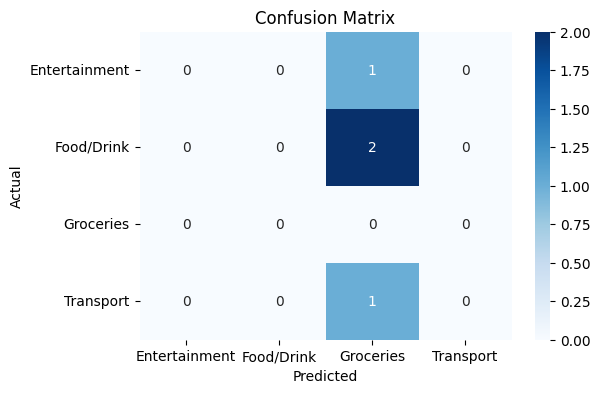


New Transaction Predictions:
Description: Dinner at McDonald's => Predicted Category: Groceries
Description: Taxi ride to station => Predicted Category: Transport
Description: Amazon grocery order => Predicted Category: Groceries
Description: HBO Max subscription => Predicted Category: Entertainment


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a sample dataset
data = {
    'description': [
        "Starbucks coffee",
        "Uber ride to airport",
        "Walmart groceries",
        "Netflix subscription",
        "Subway lunch",
        "Lyft ride downtown",
        "Whole Foods organic vegetables",
        "Movie theater tickets",
        "Burger King dinner",
        "Public bus fare",
        "Spotify music subscription",
        "Local farmer's market"
    ],
    'category': [
        "Food/Drink",    # Starbucks
        "Transport",     # Uber
        "Groceries",     # Walmart
        "Entertainment", # Netflix
        "Food/Drink",    # Subway
        "Transport",     # Lyft
        "Groceries",     # Whole Foods
        "Entertainment", # Movie theater
        "Food/Drink",    # Burger King
        "Transport",     # Public bus
        "Entertainment", # Spotify
        "Groceries"      # Farmer's market
    ]
}

df = pd.DataFrame(data)

# Step 2: Preprocess the data
X = df['description']
y = df['category']

# Step 3: Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_vect = vectorizer.fit_transform(X)

# Step 4: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.3, random_state=42)

# Step 5: Train a classifier using Multinomial Naive Bayes
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Step 6: Evaluate the model on the test set
y_pred = clf.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print Classification Report (includes precision, recall, and F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Optional: Plot Confusion Matrix for a better visual understanding
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Step 7: Make predictions on new data
new_transactions = [
    "Dinner at McDonald's",
    "Taxi ride to station",
    "Amazon grocery order",
    "HBO Max subscription"
]

new_transactions_vect = vectorizer.transform(new_transactions)
predicted_categories = clf.predict(new_transactions_vect)

print("\nNew Transaction Predictions:")
for desc, category in zip(new_transactions, predicted_categories):
    print(f"Description: {desc} => Predicted Category: {category}")


##Using Multinomial Naive Bayes


Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

Entertainment       0.33      1.00      0.50         1
   Food/Drink       0.00      0.00      0.00         1
    Groceries       0.00      0.00      0.00         1
    Transport       1.00      1.00      1.00         1

     accuracy                           0.50         4
    macro avg       0.33      0.50      0.38         4
 weighted avg       0.33      0.50      0.38         4

Confusion Matrix:
[[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [0 0 0 1]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


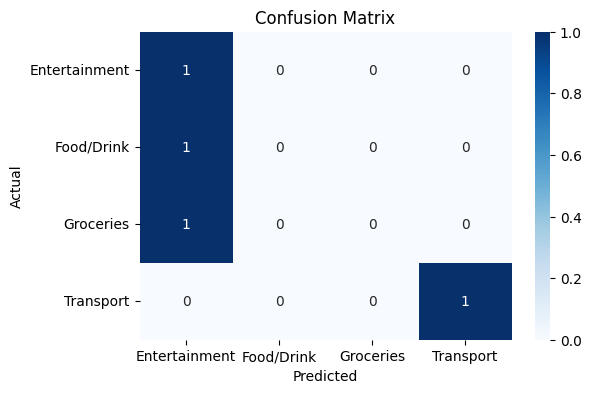


New Transaction Predictions:
Description: Dinner at McDonald's => Predicted Category: Food/Drink
Description: Taxi ride to station => Predicted Category: Transport
Description: Amazon grocery order => Predicted Category: Entertainment
Description: HBO Max subscription => Predicted Category: Entertainment
Description: Fitness class => Predicted Category: Entertainment
Description: Football match ticket => Predicted Category: Entertainment
Description: Auto Ride from stadium  => Predicted Category: Transport
Description: Amazon Prime Subscription => Predicted Category: Entertainment
Description: Lunch at Sagar Ratna => Predicted Category: Food/Drink
Description: Cab Ride From station => Predicted Category: Transport


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a sample dataset
data = {
    'description': [
        "Starbucks coffee",
        "Uber ride to airport",
        "Walmart groceries",
        "Netflix subscription",
        "Subway lunch",
        "Lyft ride downtown",
        "Whole Foods organic vegetables",
        "Movie theater tickets",
        "Burger King dinner",
        "Public bus fare",
        "Spotify music subscription",
        "Local farmer's market"
    ],
    'category': [
        "Food/Drink",    # Starbucks
        "Transport",     # Uber
        "Groceries",     # Walmart
        "Entertainment", # Netflix
        "Food/Drink",    # Subway
        "Transport",     # Lyft
        "Groceries",     # Whole Foods
        "Entertainment", # Movie theater
        "Food/Drink",    # Burger King
        "Transport",     # Public bus
        "Entertainment", # Spotify
        "Groceries"      # Farmer's market
    ]
}

df = pd.DataFrame(data)

# Step 2: Preprocess the data
X = df['description']
y = df['category']

# Step 3: Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_vect = vectorizer.fit_transform(X)

# Step 4: Split the data into training and test sets using stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_vect, y, test_size=0.3, random_state=42, stratify=y
)

# Step 5: Train a classifier using Multinomial Naive Bayes
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Step 6: Evaluate the model on the test set
y_pred = clf.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print Classification Report (includes precision, recall, and F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Optional: Plot Confusion Matrix for a better visual understanding
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Step 7: Make predictions on new data


new_transactions = [
    "Dinner at McDonald's",
    "Taxi ride to station",
    "Amazon grocery order",
    "HBO Max subscription",
    "Fitness class",
    "Football match ticket",
    "Auto Ride from stadium ",
    "Amazon Prime Subscription",
    "Lunch at Sagar Ratna",
    "Cab Ride From station"


]

new_transactions_vect = vectorizer.transform(new_transactions)
predicted_categories = clf.predict(new_transactions_vect)

print("\nNew Transaction Predictions:")
for desc, category in zip(new_transactions, predicted_categories):
    print(f"Description: {desc} => Predicted Category: {category}")


##Visualization of Results

Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

Entertainment       0.33      1.00      0.50         1
   Food/Drink       0.00      0.00      0.00         1
    Groceries       0.00      0.00      0.00         1
    Transport       1.00      1.00      1.00         1

     accuracy                           0.50         4
    macro avg       0.33      0.50      0.38         4
 weighted avg       0.33      0.50      0.38         4

Confusion Matrix:
[[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [0 0 0 1]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

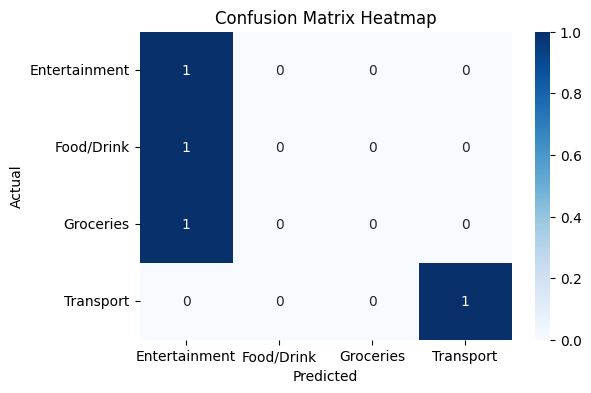

<ipython-input-2-882818aa9df3>:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(category_wise_accuracy.keys()), y=list(category_wise_accuracy.values()), palette="coolwarm")


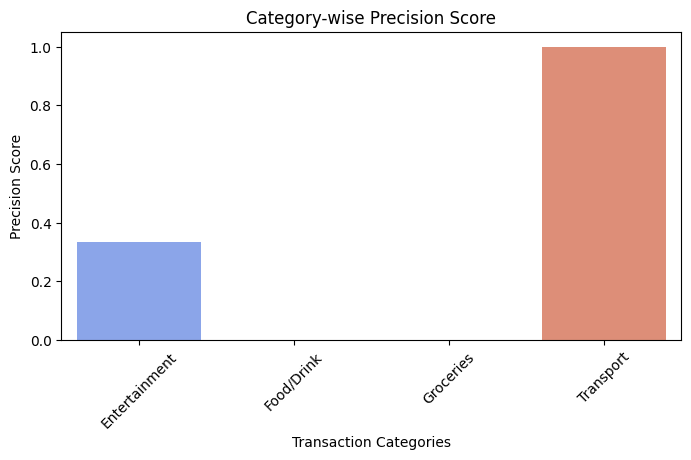

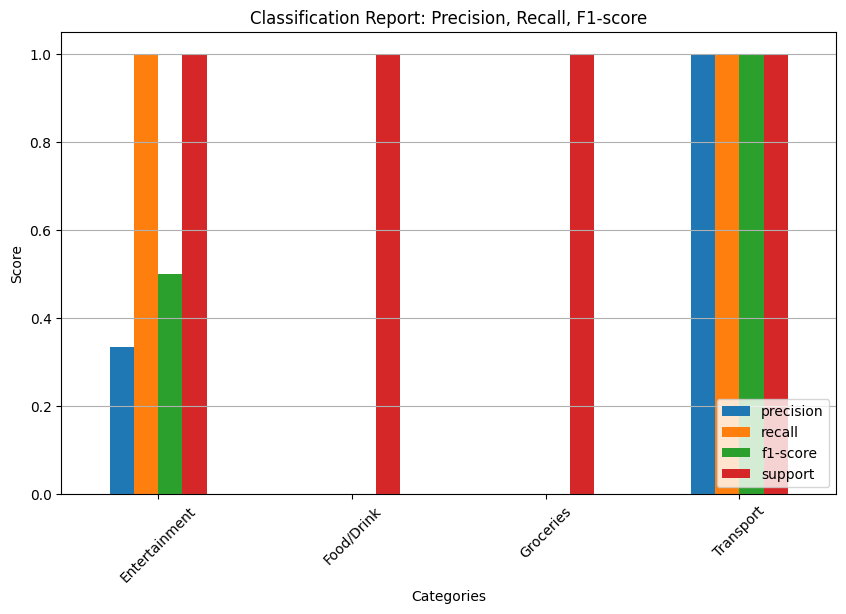

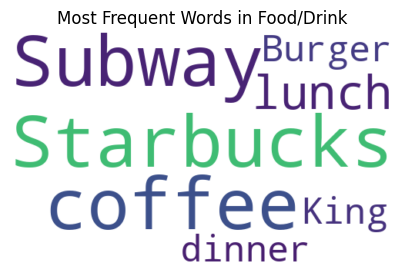

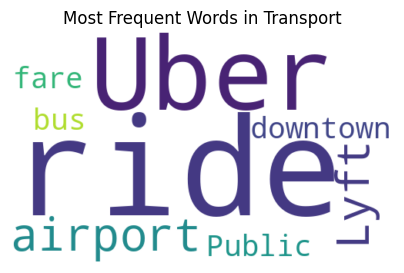

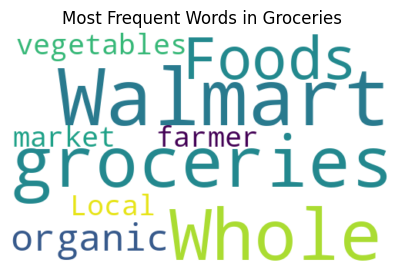

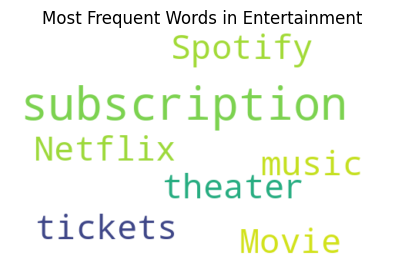


New Transaction Predictions:
Description: Dinner at McDonald's => Predicted Category: Food/Drink
Description: Taxi ride to station => Predicted Category: Transport
Description: Amazon grocery order => Predicted Category: Entertainment
Description: HBO Max subscription => Predicted Category: Entertainment
Description: Fitness class => Predicted Category: Entertainment
Description: Football match ticket => Predicted Category: Entertainment
Description: Auto Ride from stadium => Predicted Category: Transport
Description: Amazon Prime Subscription => Predicted Category: Entertainment
Description: Lunch at Sagar Ratna => Predicted Category: Food/Drink
Description: Cab Ride From station => Predicted Category: Transport


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix
)

# Step 1: Creating a sample dataset
data = {
    'description': [
        "Starbucks coffee", "Uber ride to airport", "Walmart groceries", "Netflix subscription",
        "Subway lunch", "Lyft ride downtown", "Whole Foods organic vegetables", "Movie theater tickets",
        "Burger King dinner", "Public bus fare", "Spotify music subscription", "Local farmer's market"
    ],
    'category': [
        "Food/Drink", "Transport", "Groceries", "Entertainment",
        "Food/Drink", "Transport", "Groceries", "Entertainment",
        "Food/Drink", "Transport", "Entertainment", "Groceries"
    ]
}

df = pd.DataFrame(data)

# Step 2: Preprocessing of data
X = df['description']
y = df['category']

# Step 3: Vectorization the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_vect = vectorizer.fit_transform(X)

# Step 4: Splittting the data into training and test sets using stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_vect, y, test_size=0.3, random_state=42, stratify=y
)

# Step 5: Train a classifier using Multinomial Naive Bayes
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Step 6: Evaluate the model on the test set
y_pred = clf.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print Classification Report (includes precision, recall, and F1-score)
class_report = classification_report(y_test, y_pred, output_dict=True)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

#VISUALIZATIONS

# 1. Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()

# 2. Bar Chart for Category-wise Accuracy
category_wise_accuracy = {category: class_report[category]['precision'] for category in class_report if category in clf.classes_}
plt.figure(figsize=(8, 4))
sns.barplot(x=list(category_wise_accuracy.keys()), y=list(category_wise_accuracy.values()), palette="coolwarm")
plt.xlabel("Transaction Categories")
plt.ylabel("Precision Score")
plt.title("Category-wise Precision Score")
plt.xticks(rotation=45)
plt.show()

# 3. Precision, Recall, and F1-score Visualization
df_report = pd.DataFrame(class_report).T.iloc[:-3, :]  # Removing last 3 rows (macro avg, weighted avg, etc.)

df_report.plot(kind='bar', figsize=(10, 6))
plt.title("Classification Report: Precision, Recall, F1-score")
plt.ylabel("Score")
plt.xlabel("Categories")
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.show()

#4. Word Cloud for Most Important Words in Each Category
for category in df['category'].unique():
    category_data = df[df['category'] == category]['description']
    text = " ".join(category_data)
    wordcloud = WordCloud(width=500, height=300, background_color="white").generate(text)

    plt.figure(figsize=(5, 3))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Most Frequent Words in {category}")
    plt.show()

#PREDICTIONS ON NEW TRANSACTIONS

new_transactions = [
    "Dinner at McDonald's", "Taxi ride to station", "Amazon grocery order", "HBO Max subscription",
    "Fitness class", "Football match ticket", "Auto Ride from stadium", "Amazon Prime Subscription",
    "Lunch at Sagar Ratna", "Cab Ride From station"
]

new_transactions_vect = vectorizer.transform(new_transactions)
predicted_categories = clf.predict(new_transactions_vect)

print("\nNew Transaction Predictions:")
for desc, category in zip(new_transactions, predicted_categories):
    print(f"Description: {desc} => Predicted Category: {category}")


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predic

Cross-Validation Accuracy Scores: [0.5  0.5  0.5  0.25 0.25]
Mean CV Accuracy: 0.4

Test Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

Entertainment       0.00      0.00      0.00         1
   Food/Drink       0.50      1.00      0.67         3
    Groceries       0.00      0.00      0.00         1
    Transport       0.00      0.00      0.00         1

     accuracy                           0.50         6
    macro avg       0.12      0.25      0.17         6
 weighted avg       0.25      0.50      0.33         6

Confusion Matrix:
[[0 1 0 0]
 [0 3 0 0]
 [0 1 0 0]
 [0 1 0 0]]


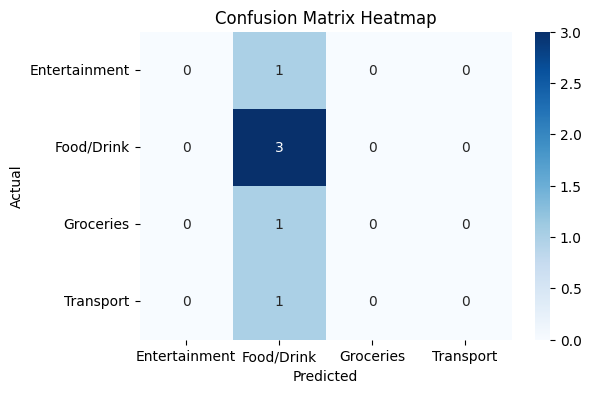

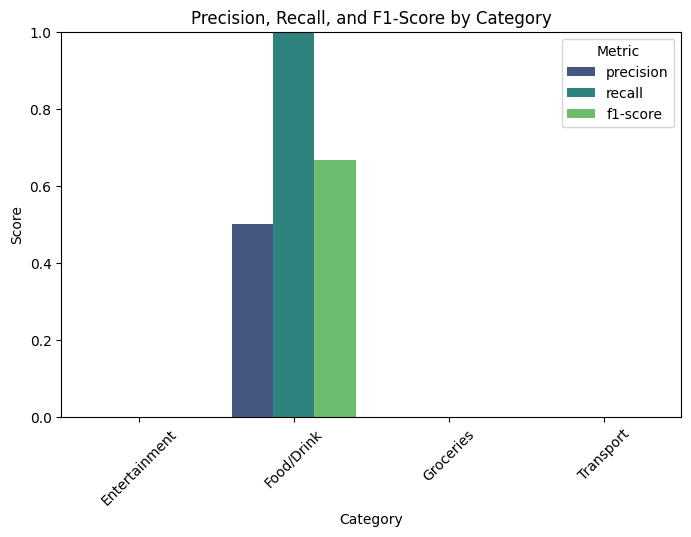

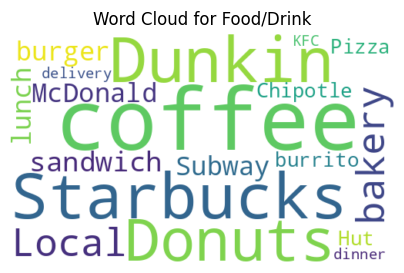

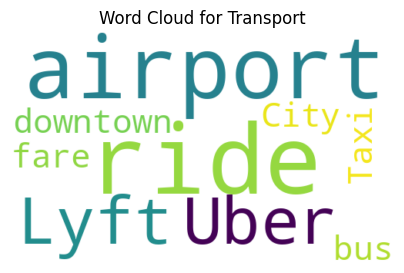

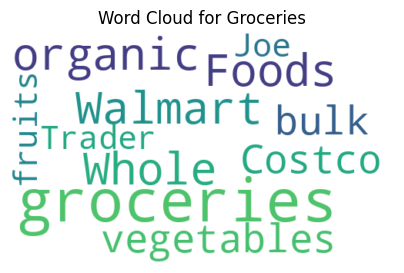

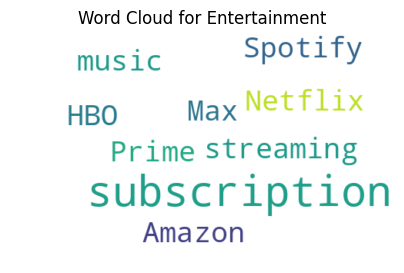


New Transaction Predictions:
Description: Dinner at McDonald's => Predicted Category: Food/Drink
Description: Taxi ride to station => Predicted Category: Food/Drink
Description: Amazon grocery order => Predicted Category: Food/Drink
Description: HBO Max subscription => Predicted Category: Entertainment
Description: Fitness class => Predicted Category: Food/Drink
Description: Football match ticket => Predicted Category: Food/Drink
Description: Auto ride from stadium => Predicted Category: Transport
Description: Amazon Prime subscription => Predicted Category: Entertainment
Description: Lunch at Sagar Ratna => Predicted Category: Food/Drink
Description: Cab ride from station => Predicted Category: Transport


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from wordcloud import WordCloud

# ----------------- Step 1: Create an Expanded Sample Dataset ----------------- #
# (Feel free to add more rows with varied transaction descriptions)
data = {
    'description': [
        "Starbucks coffee", "Dunkin Donuts coffee", "Local bakery sandwich", "McDonald's burger",
        "Uber ride to airport", "Lyft ride downtown", "City bus fare", "Taxi from airport",
        "Walmart groceries", "Whole Foods organic vegetables", "Costco bulk groceries", "Trader Joe's fruits",
        "Netflix subscription", "HBO Max subscription", "Spotify music subscription", "Amazon Prime streaming",
        "Subway lunch", "Chipotle burrito", "Pizza Hut delivery", "KFC dinner"
    ],
    'category': [
        "Food/Drink", "Food/Drink", "Food/Drink", "Food/Drink",  # Food/Drink examples
        "Transport", "Transport", "Transport", "Transport",      # Transport examples
        "Groceries", "Groceries", "Groceries", "Groceries",      # Groceries examples
        "Entertainment", "Entertainment", "Entertainment", "Entertainment",  # Entertainment examples
        "Food/Drink", "Food/Drink", "Food/Drink", "Food/Drink"     # More Food/Drink examples
    ]
}

df = pd.DataFrame(data)

# ----------------- Step 2: Preprocess and Vectorize the Data ----------------- #
# Use TF-IDF Vectorizer with bigrams and English stopwords
vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words="english")
X_vect = vectorizer.fit_transform(df['description'])
y = df['category']

# ----------------- Step 3: Use Cross-Validation with Logistic Regression ----------------- #
# We use StratifiedKFold for balanced splits.
clf = LogisticRegression(max_iter=200)

# Using 5-fold cross-validation to estimate accuracy
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(clf, X_vect, y, cv=skf, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# For visualization and detailed metrics, split data into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_vect, y, test_size=0.3, random_state=42, stratify=y
)

# Train the Logistic Regression model
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# ----------------- Step 4: Evaluation Metrics ----------------- #
accuracy = accuracy_score(y_test, y_pred)
print("\nTest Accuracy:", accuracy)

class_report = classification_report(y_test, y_pred, output_dict=True)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# ----------------- Step 5: Visualizations ----------------- #

# 5.1 Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()

# 5.2 Bar Chart for Classification Report Metrics per Category
# Extract precision, recall, f1-score for each category (ignore averages)
metrics_df = pd.DataFrame(class_report).T.iloc[:-3, :3]  # Exclude "macro avg", "weighted avg", "accuracy"
metrics_df = metrics_df.reset_index().rename(columns={'index': 'Category'})

metrics_df_melt = pd.melt(metrics_df, id_vars='Category', value_vars=['precision', 'recall', 'f1-score'])
plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='value', hue='variable', data=metrics_df_melt, palette="viridis")
plt.title("Precision, Recall, and F1-Score by Category")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(title="Metric")
plt.xticks(rotation=45)
plt.show()

# 5.3 Word Cloud for Each Category
for category in df['category'].unique():
    category_data = df[df['category'] == category]['description']
    text = " ".join(category_data)
    wordcloud = WordCloud(width=500, height=300, background_color="white").generate(text)

    plt.figure(figsize=(5, 3))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {category}")
    plt.show()

# ----------------- Step 6: Predictions on New Data ----------------- #
new_transactions = [
    "Dinner at McDonald's", "Taxi ride to station", "Amazon grocery order", "HBO Max subscription",
    "Fitness class", "Football match ticket", "Auto ride from stadium", "Amazon Prime subscription",
    "Lunch at Sagar Ratna", "Cab ride from station"
]

new_transactions_vect = vectorizer.transform(new_transactions)
predicted_categories = clf.predict(new_transactions_vect)

print("\nNew Transaction Predictions:")
for desc, category in zip(new_transactions, predicted_categories):
    print(f"Description: {desc} => Predicted Category: {category}")


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'C': 10, 'kernel': 'linear'}

Test Accuracy: 0.36363636363636365

Classification Report:
               precision    recall  f1-score   support

   Automobile       0.00      0.00      0.00         1
Entertainment       0.00      0.00      0.00         3
   Food/Drink       0.33      1.00      0.50         3
    Groceries       0.00      0.00      0.00         1
       Health       0.00      0.00      0.00         1
    Transport       1.00      1.00      1.00         1
       Travel       0.00      0.00      0.00         1

     accuracy                           0.36        11
    macro avg       0.19      0.29      0.21        11
 weighted avg       0.18      0.36      0.23        11

Confusion Matrix:
[[0 0 1 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

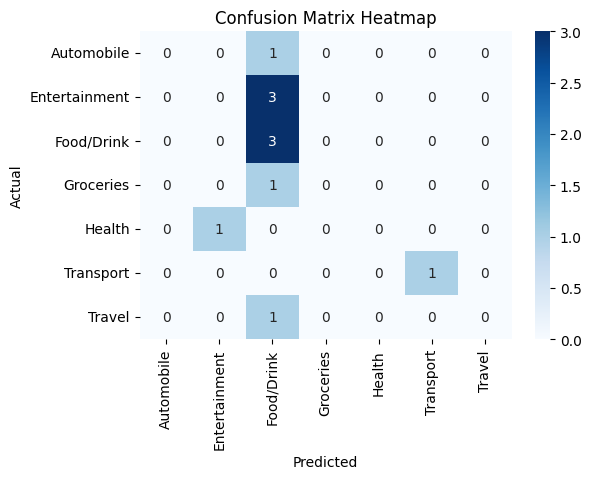

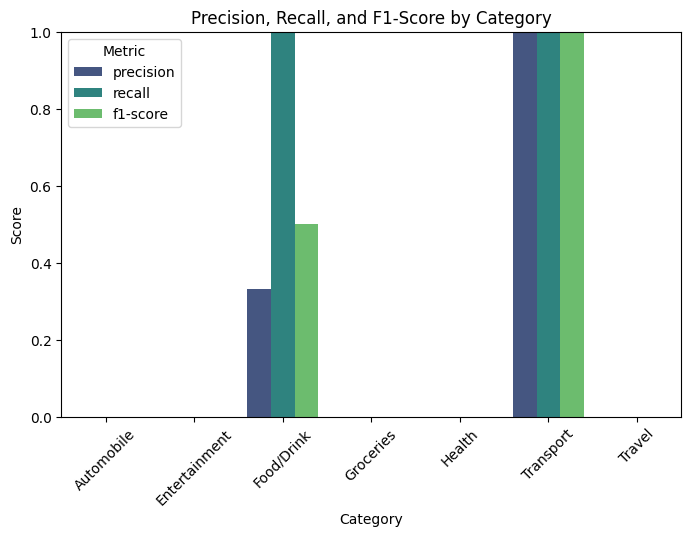

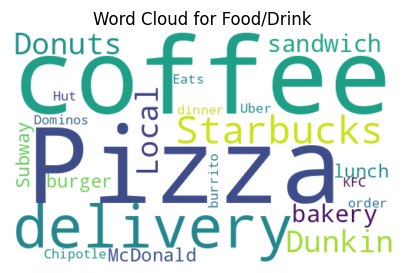

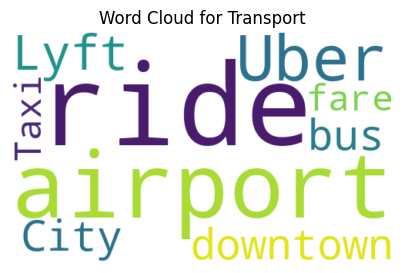

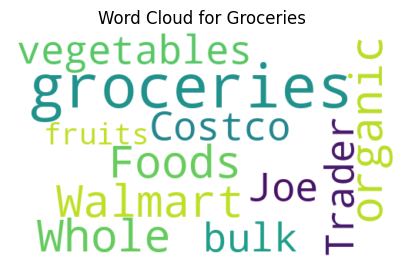

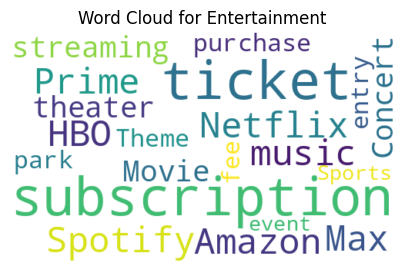

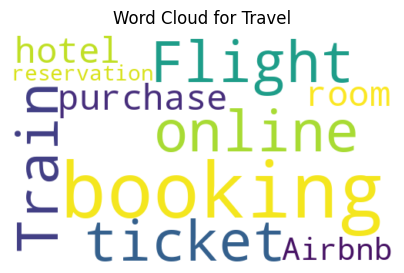

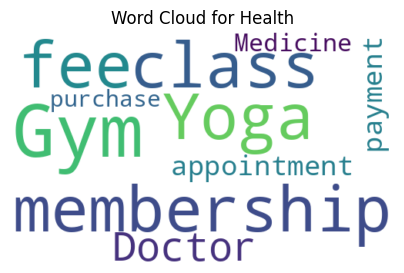

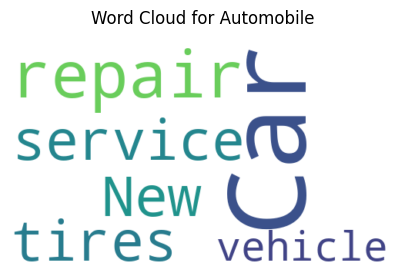


New Transaction Predictions:
Description: Dinner at McDonald's => Predicted Category: Food/Drink
Description: Taxi ride to station => Predicted Category: Transport
Description: Amazon grocery order => Predicted Category: Food/Drink
Description: HBO Max subscription => Predicted Category: Entertainment
Description: Fitness class => Predicted Category: Health
Description: Football match ticket => Predicted Category: Entertainment
Description: Auto ride from stadium => Predicted Category: Transport
Description: Amazon Prime subscription => Predicted Category: Entertainment
Description: Lunch at Sagar Ratna => Predicted Category: Food/Drink
Description: Cab ride from station => Predicted Category: Transport


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from wordcloud import WordCloud

# ----------------- Step 1: Create an Expanded Sample Dataset ----------------- #
data = {
    'description': [
        "Starbucks coffee", "Dunkin Donuts coffee", "Local bakery sandwich", "McDonald's burger",
        "Uber ride to airport", "Lyft ride downtown", "City bus fare", "Taxi from airport",
        "Walmart groceries", "Whole Foods organic vegetables", "Costco bulk groceries", "Trader Joe's fruits",
        "Netflix subscription", "HBO Max subscription", "Spotify music subscription", "Amazon Prime streaming",
        "Subway lunch", "Chipotle burrito", "Pizza Hut delivery", "KFC dinner",
        "Flight booking online", "Train ticket purchase", "Booking a hotel room", "Airbnb reservation",
        "Gym membership", "Yoga class fee", "Doctor appointment payment", "Medicine purchase",
        "Car repair service", "New tires for vehicle", "Uber Eats order", "Dominos pizza delivery",
        "Movie theater ticket", "Concert ticket purchase", "Theme park entry fee", "Sports event ticket"
    ],
    'category': [
        "Food/Drink", "Food/Drink", "Food/Drink", "Food/Drink",
        "Transport", "Transport", "Transport", "Transport",
        "Groceries", "Groceries", "Groceries", "Groceries",
        "Entertainment", "Entertainment", "Entertainment", "Entertainment",
        "Food/Drink", "Food/Drink", "Food/Drink", "Food/Drink",
        "Travel", "Travel", "Travel", "Travel",
        "Health", "Health", "Health", "Health",
        "Automobile", "Automobile", "Food/Drink", "Food/Drink",
        "Entertainment", "Entertainment", "Entertainment", "Entertainment"
    ]
}

df = pd.DataFrame(data)

# ----------------- Step 2: Preprocess and Vectorize the Data ----------------- #
vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words="english")
X_vect = vectorizer.fit_transform(df['description'])
y = df['category']

# ----------------- Step 3: Use Cross-Validation with SVM ----------------- #
svm_model = SVC()

param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(svm_model, param_grid, cv=skf, scoring='accuracy')
grid_search.fit(X_vect, y)

print("Best Parameters:", grid_search.best_params_)

# ----------------- Step 4: Split and Train Best Model ----------------- #
X_train, X_test, y_train, y_test = train_test_split(
    X_vect, y, test_size=0.3, random_state=42, stratify=y
)

best_svm = grid_search.best_estimator_
best_svm.fit(X_train, y_train)
y_pred = best_svm.predict(X_test)

# ----------------- Step 5: Evaluation Metrics ----------------- #
accuracy = accuracy_score(y_test, y_pred)
print("\nTest Accuracy:", accuracy)

class_report = classification_report(y_test, y_pred, output_dict=True)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# ----------------- Step 6: Visualizations ----------------- #

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=best_svm.classes_, yticklabels=best_svm.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Bar Chart for Precision, Recall, and F1-Score by Category
metrics_df = pd.DataFrame(class_report).T.iloc[:-3, :3]
metrics_df = metrics_df.reset_index().rename(columns={'index': 'Category'})

metrics_df_melt = pd.melt(metrics_df, id_vars='Category', value_vars=['precision', 'recall', 'f1-score'])
plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='value', hue='variable', data=metrics_df_melt, palette="viridis")
plt.title("Precision, Recall, and F1-Score by Category")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(title="Metric")
plt.xticks(rotation=45)
plt.show()

# Word Cloud for Each Category
for category in df['category'].unique():
    category_data = df[df['category'] == category]['description']
    text = " ".join(category_data)
    wordcloud = WordCloud(width=500, height=300, background_color="white").generate(text)

    plt.figure(figsize=(5, 3))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {category}")
    plt.show()

# ----------------- Step 7: Predictions on New Data ----------------- #
new_transactions = [
    "Dinner at McDonald's", "Taxi ride to station", "Amazon grocery order", "HBO Max subscription",
    "Fitness class", "Football match ticket", "Auto ride from stadium", "Amazon Prime subscription",
    "Lunch at Sagar Ratna", "Cab ride from station"
]

new_transactions_vect = vectorizer.transform(new_transactions)
predicted_categories = best_svm.predict(new_transactions_vect)

print("\nNew Transaction Predictions:")
for desc, category in zip(new_transactions, predicted_categories):
    print(f"Description: {desc} => Predicted Category: {category}")


#Final Code

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'C': 10, 'kernel': 'linear'}

Test Accuracy: 0.5454545454545454

Classification Report:
               precision    recall  f1-score   support

   Automobile       1.00      1.00      1.00         1
Entertainment       0.00      0.00      0.00         2
   Food/Drink       0.33      1.00      0.50         2
    Groceries       1.00      0.50      0.67         2
       Health       0.00      0.00      0.00         1
    Transport       0.67      1.00      0.80         2
       Travel       0.00      0.00      0.00         1

     accuracy                           0.55        11
    macro avg       0.43      0.50      0.42        11
 weighted avg       0.45      0.55      0.45        11

Confusion Matrix:
[[1 0 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 1 1 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 1 0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


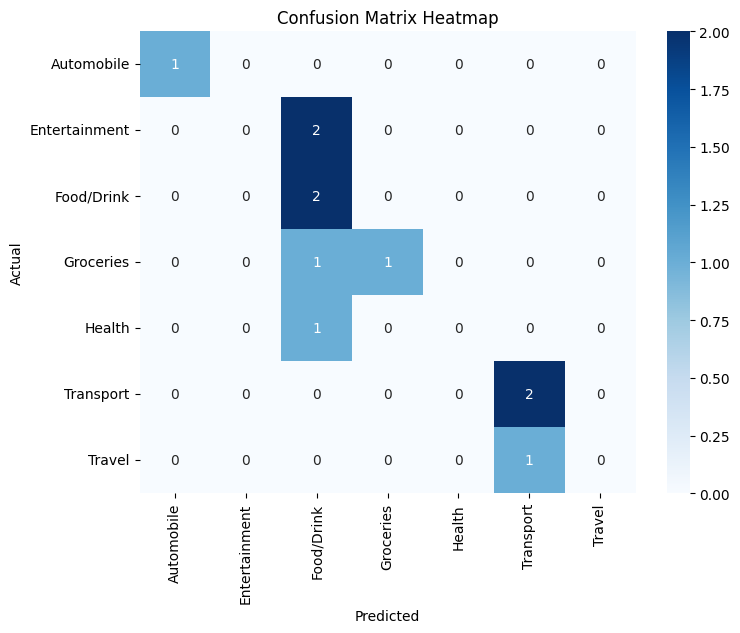

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


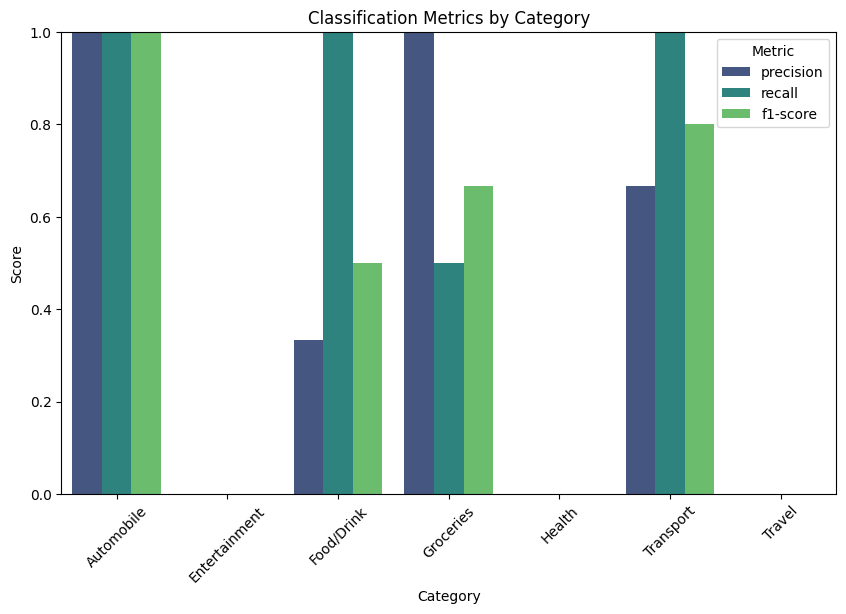

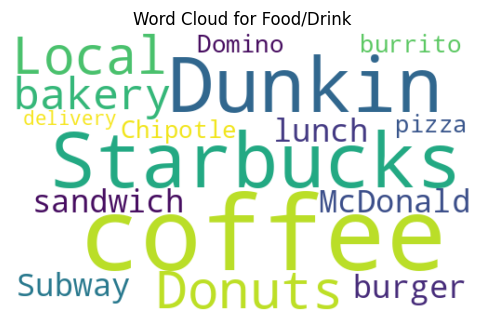

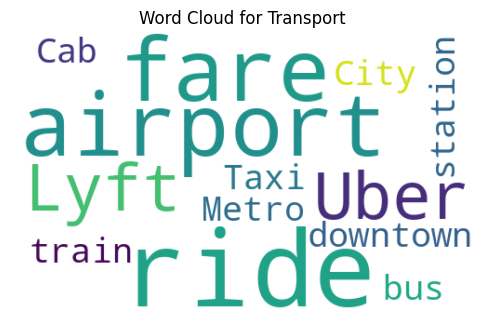

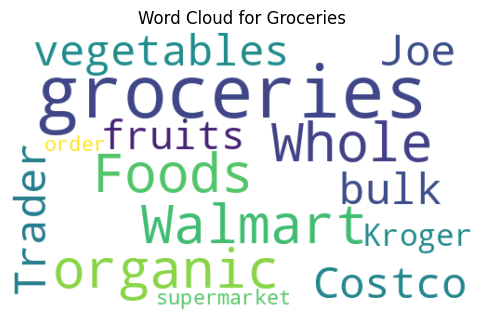

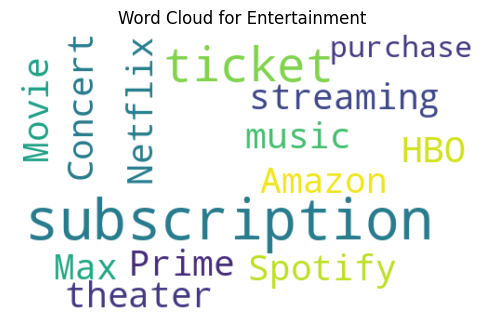

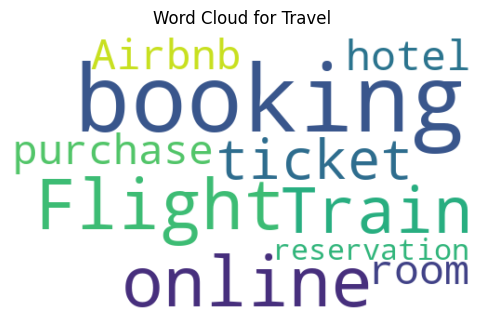

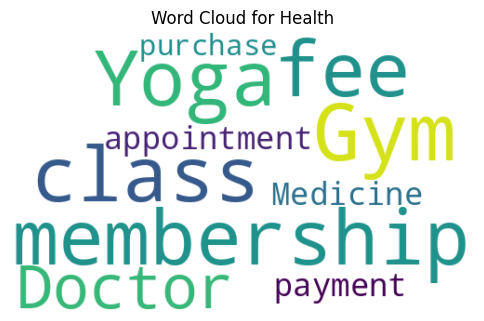

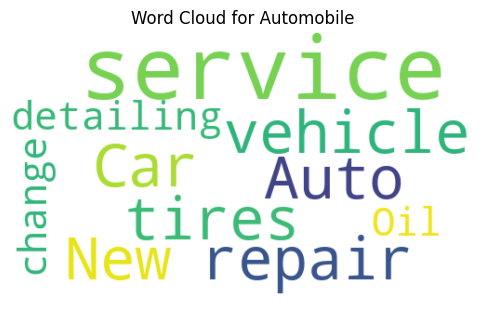


New Transaction Predictions:
Description: Dinner at McDonald's => Predicted Category: Food/Drink
Description: Taxi ride to station => Predicted Category: Transport
Description: Amazon grocery order => Predicted Category: Entertainment
Description: HBO Max subscription => Predicted Category: Entertainment
Description: Fitness class => Predicted Category: Health
Description: Football match ticket => Predicted Category: Food/Drink
Description: Auto ride from stadium => Predicted Category: Transport
Description: Amazon Prime subscription => Predicted Category: Entertainment
Description: Lunch at Sagar Ratna => Predicted Category: Food/Drink
Description: Cab ride from station => Predicted Category: Transport


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from wordcloud import WordCloud

# ----------------- Step 1: Create an Expanded & Balanced Sample Dataset ----------------- #
data = {
    'description': [
        # Food/Drink examples (7 samples)
        "Starbucks coffee", "Dunkin Donuts coffee", "Local bakery sandwich", "McDonald's burger",
        "Subway lunch", "Chipotle burrito", "Domino's pizza delivery",
        # Transport examples (6 samples)
        "Uber ride to airport", "Lyft ride downtown", "City bus fare", "Taxi from airport",
        "Cab ride from station", "Metro train fare",
        # Groceries examples (5 samples)
        "Walmart groceries", "Whole Foods organic vegetables", "Costco bulk groceries",
        "Trader Joe's fruits", "Kroger supermarket order",
        # Entertainment examples (6 samples)
        "Netflix subscription", "HBO Max subscription", "Spotify music subscription",
        "Amazon Prime streaming", "Movie theater ticket", "Concert ticket purchase",
        # Travel examples (4 samples)
        "Flight booking online", "Train ticket purchase", "Booking a hotel room", "Airbnb reservation",
        # Health examples (4 samples)
        "Gym membership", "Yoga class fee", "Doctor appointment payment", "Medicine purchase",
        # Automobile examples (4 samples)
        "Car repair service", "New tires for vehicle", "Auto detailing service", "Oil change service"
    ],
    'category': [
        "Food/Drink", "Food/Drink", "Food/Drink", "Food/Drink",
        "Food/Drink", "Food/Drink", "Food/Drink",
        "Transport", "Transport", "Transport", "Transport", "Transport", "Transport",
        "Groceries", "Groceries", "Groceries", "Groceries", "Groceries",
        "Entertainment", "Entertainment", "Entertainment", "Entertainment", "Entertainment", "Entertainment",
        "Travel", "Travel", "Travel", "Travel",
        "Health", "Health", "Health", "Health",
        "Automobile", "Automobile", "Automobile", "Automobile"
    ]
}
df = pd.DataFrame(data)

# ----------------- Step 2: Preprocess and Vectorize the Data ----------------- #
vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words="english")
X_vect = vectorizer.fit_transform(df['description'])
y = df['category']

# ----------------- Step 3: Use Cross-Validation with SVM (with Class Weighting) ----------------- #
# SVM with class_weight='balanced' helps mitigate class imbalance.
svm_model = SVC(class_weight='balanced')
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(svm_model, param_grid, cv=skf, scoring='accuracy')
grid_search.fit(X_vect, y)

print("Best Parameters:", grid_search.best_params_)

# ----------------- Step 4: Split and Train the Best Model ----------------- #
X_train, X_test, y_train, y_test = train_test_split(
    X_vect, y, test_size=0.3, random_state=42, stratify=y
)

best_svm = grid_search.best_estimator_
best_svm.fit(X_train, y_train)
y_pred = best_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("\nTest Accuracy:", accuracy)

print("\nClassification Report:")
report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# ----------------- Step 5: Visualizations ----------------- #

# 5.1 Confusion Matrix Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_svm.classes_, yticklabels=best_svm.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()

# 5.2 Bar Chart for Classification Metrics (Precision, Recall, F1-Score)
class_report_dict = classification_report(y_test, y_pred, output_dict=True)
# Remove the average rows from the report dictionary
metrics_df = pd.DataFrame(class_report_dict).T.drop(['accuracy', 'macro avg', 'weighted avg'], errors='ignore')
metrics_df = metrics_df[['precision', 'recall', 'f1-score']].reset_index().rename(columns={'index': 'Category'})
metrics_df_melt = pd.melt(metrics_df, id_vars='Category', value_vars=['precision', 'recall', 'f1-score'])

plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='value', hue='variable', data=metrics_df_melt, palette='viridis')
plt.title('Classification Metrics by Category')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.show()

# 5.3 Word Clouds for Each Category
for category in df['category'].unique():
    cat_data = df[df['category'] == category]['description']
    text = " ".join(cat_data)
    wordcloud = WordCloud(width=500, height=300, background_color='white').generate(text)

    plt.figure(figsize=(6,4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {category}')
    plt.show()

# ----------------- Step 6: Predictions on New Data ----------------- #
new_transactions = [
    "Dinner at McDonald's", "Taxi ride to station", "Amazon grocery order", "HBO Max subscription",
    "Fitness class", "Football match ticket", "Auto ride from stadium", "Amazon Prime subscription",
    "Lunch at Sagar Ratna", "Cab ride from station"
]
new_transactions_vect = vectorizer.transform(new_transactions)
predicted_categories = best_svm.predict(new_transactions_vect)

print("\nNew Transaction Predictions:")
for desc, cat in zip(new_transactions, predicted_categories):
    print(f"Description: {desc} => Predicted Category: {cat}")
